# Digital Marketing & Advertising Campaign – Case Study

In this case study, we are helping the client to identify an ad that will generate them the maximum return on marketing investment (ROMI). We employ $\bf{Bayesian\;statistics\;to\;improve\;A/B\;Testing}$.

Traditional A/B testing or hypothesis testing is a form of the frequentist approach (Fisherian statistics). Bayesian statistics, on the other hand, can use prior knowledgeand the new evidence (i.e. data) to generate new knowledge.


In [1]:
# Import plot libraries
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



In [2]:
# Function to generate alpha and beta when mean 
# and standard deviation of the distribution is known
Beta_Parameters <- function(mean, variance) {
  alpha <- ((1 - mean) / variance - 1 / mean) * mean ^ 2
  beta <- alpha * (1 / mean - 1)
  return(Beta_Parameters = list(alpha = alpha, beta = beta))
}

In [3]:
#  Load data
base_dir <- c('/Users/DesyFellow/Desktop/CaseStudy')
filename <- c('digital_marketing.csv')
data <- read.csv(paste(base_dir, filename, sep="/"), 
                 sep=",",  dec=",")

In [4]:
# Name of features
names(data)

[1] "Ads"               "Total.Emails.Sent" "Clicks..1st.hour."
[4] "Opens..1st.hour."  "Clicks..5.days."   "Opens..5.days."

In [5]:
# General information
str(data)

'data.frame':	3 obs. of  6 variables:
 $ Ads              : Factor w/ 3 levels "A","B","C": 1 2 3
 $ Total.Emails.Sent: int  5500 9000 12500
 $ Clicks..1st.hour.: int  4 14 23
 $ Opens..1st.hour. : int  58 101 129
 $ Clicks..5.days.  : int  41 98 230
 $ Opens..5.days.   : int  554 922 1235


In [6]:
# Head information
head(data)

Ads,Total.Emails.Sent,Clicks..1st.hour.,Opens..1st.hour.,Clicks..5.days.,Opens..5.days.
A,5500,4,58,41,554
B,9000,14,101,98,922
C,12500,23,129,230,1235


In [7]:
# Statistical summary
summary(data)

 Ads   Total.Emails.Sent Clicks..1st.hour. Opens..1st.hour. Clicks..5.days.
 A:1   Min.   : 5500     Min.   : 4.00     Min.   : 58.0    Min.   : 41.0  
 B:1   1st Qu.: 7250     1st Qu.: 9.00     1st Qu.: 79.5    1st Qu.: 69.5  
 C:1   Median : 9000     Median :14.00     Median :101.0    Median : 98.0  
       Mean   : 9000     Mean   :13.67     Mean   : 96.0    Mean   :123.0  
       3rd Qu.:10750     3rd Qu.:18.50     3rd Qu.:115.0    3rd Qu.:164.0  
       Max.   :12500     Max.   :23.00     Max.   :129.0    Max.   :230.0  
 Opens..5.days.  
 Min.   : 554.0  
 1st Qu.: 738.0  
 Median : 922.0  
 Mean   : 903.7  
 3rd Qu.:1078.5  
 Max.   :1235.0  

In [8]:
# Statistical description
describe(data)

data 

 6  Variables      3  Observations
--------------------------------------------------------------------------------
Ads 
       n  missing distinct 
       3        0        3 
                            
Value          A     B     C
Frequency      1     1     1
Proportion 0.333 0.333 0.333
--------------------------------------------------------------------------------
Total.Emails.Sent 
       n  missing distinct     Info     Mean      Gmd 
       3        0        3        1     9000     4667 
                            
Value       5500  9000 12500
Frequency      1     1     1
Proportion 0.333 0.333 0.333
--------------------------------------------------------------------------------
Clicks..1st.hour. 
       n  missing distinct     Info     Mean      Gmd 
       3        0        3        1    13.67    12.67 
                            
Value          4    14    23
Frequency      1     1     1
Proportion 0.333 0.333 0.333
------------------------------------------------

In [9]:
# Determine class label composition (can also be read from the above printout)
table(data$Total.Emails.Sent)


 5500  9000 12500 
    1     1     1 

## Prior Distributions

In [11]:
# Generate alpha and beta for beta distributions priors  
# for the three ads (A,B, and C) campaigns
a<-Beta_Parameters(0.15,0.0016)
b<-Beta_Parameters(0.16,0.0016)
c<-Beta_Parameters(0.17,0.0016)

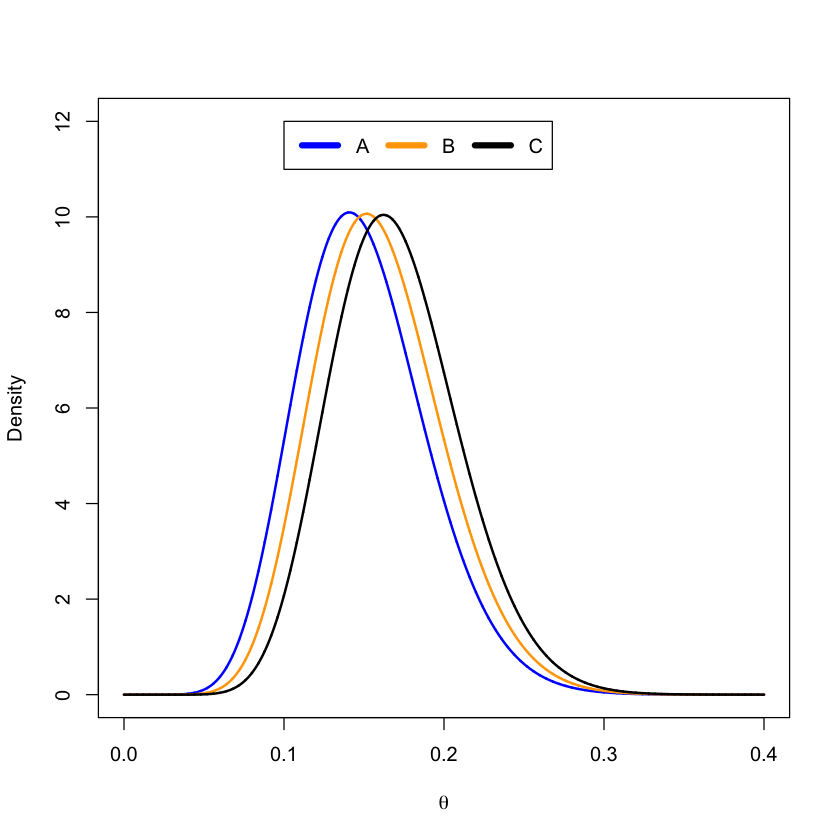

In [12]:
# Plot prior beta distibutions for the three ads (A,B, and C) campaigns
x=seq(0,0.4,length=10000)
y=dbeta(x,  a$alpha, a$beta)
y1=dbeta(x, b$alpha, b$beta)
y2=dbeta(x, c$alpha, c$beta)

plot(x, y, type="l", col="blue", ylim = c(0,12), xlim=c(0,.40),
     lwd=2, ylab='Density',xlab=expression(theta))
lines(x, y1, col="orange", lwd=2)
lines(x, y2, col="black", lwd=2)
legend(0.1, 12,legend=c("A", "B", "C"), col=c("blue","orange","black"), 
       lwd=5, cex=1, horiz=TRUE)

In [13]:
# Simulate data to identify probability of ads A better than B 
# with the prior distibutions
a_simulation=rbeta(10^6, a$alpha, a$beta)
b_simulation=rbeta(10^6, b$alpha, b$beta)
c_simulation=rbeta(10^6, c$alpha, c$beta)

mean(b_simulation > a_simulation)
mean(c_simulation > b_simulation)
mean(c_simulation > a_simulation)

[1] 0.571842

[1] 0.570714

[1] 0.640254

## 1$^{st}$ hour of data collection

In [14]:
# Results from the campaign in the first hour
a1=data$Clicks..1st.hour[1] #4
an1=data$Opens..1st.hour[1] #58
b1=data$Clicks..1st.hour[2] #14
bn1=data$Opens..1st.hour[2] #101
c1=data$Clicks..1st.hour[3] #23
cn1=data$Opens..1st.hour[3] #129

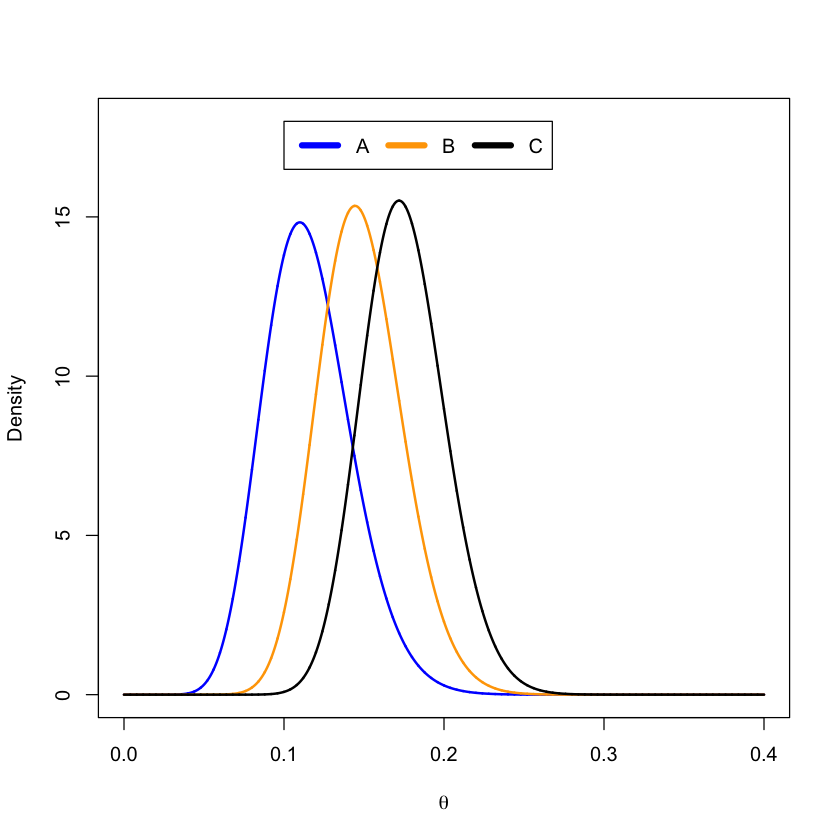

In [15]:
#Plot posterior beta distibutions for the three ads (A,B, and C) afterincorporating evidence from the first hour
x=seq(0,0.4,length=10000)
y=dbeta(x,a$alpha+a1,a$beta+an1-a1)
y1=dbeta(x,b$alpha+b1,b$beta+bn1-b1)
y2=dbeta(x,c$alpha+c1,c$beta+cn1-c1)

plot(x, y, type="l", col="blue", ylim=c(0,18),
     xlim=c(0,.40), lwd=2, ylab='Density', xlab=expression(theta))
lines(x, y1, col="orange", lwd=2)
lines(x, y2, col="black", lwd=2)
legend(0.1, 18, legend=c("A", "B", "C"), col=c("blue","orange","black"), 
       lwd=5, cex=1, horiz=TRUE)

In [16]:
# Simulate data to identify probability of ads A better than B 
# with the prior distibutions
a_simulation=rbeta(10^6,a$alpha+a1,a$beta+an1-a1)
b_simulation=rbeta(10^6,b$alpha+b1,b$beta+bn1-b1)
c_simulation=rbeta(10^6,c$alpha+c1,c$beta+cn1-c1)

mean(b_simulation>a_simulation)
mean(c_simulation>b_simulation)
mean(c_simulation>a_simulation)

[1] 0.809644

[1] 0.76803

[1] 0.941206

## Complete Experiment: Posterior Distributions after 5-days


In [18]:
# The final results from the campaign after the 5th day
a1=data$Clicks..5.days[1]      #41
an1=data$Opens..5.days[1] #554
b1=data$Clicks..5.days[2]      #98
bn1=data$Opens..5.days[2] #922
c1=data$Clicks..5.days[3      ]# 230
cn1=data$Opens..5.days[3] #1235

In [19]:
#Plot posterior beta distibutions for the three ads (A,B, and C) 
# after incorporating the final evidence from the campaign
x=seq(0,0.4,length=10000)
y=dbeta(x,a$alpha+a1,a$beta+an1-a1)
y1=dbeta(x,b$alpha+b1,b$beta+bn1-b1)
y2=dbeta(x,c$alpha+c1,c$beta+cn1-c1)

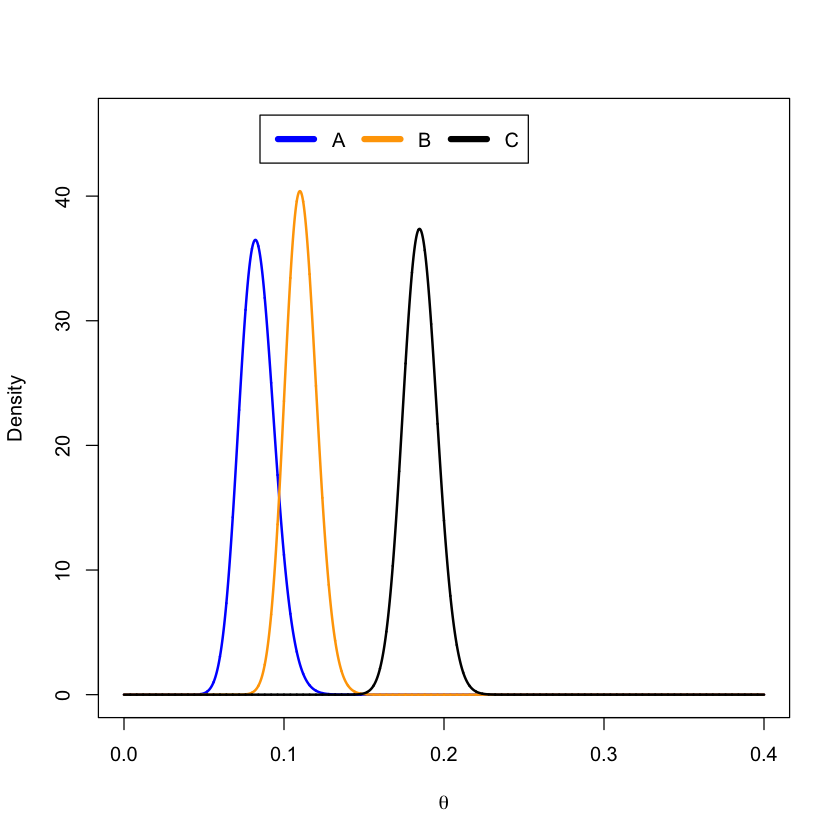

In [20]:
#Simulate data to identify probability of ads A better than B 
# with the prior distibutions
plot(x, y, type="l", col="blue", ylim=c(0,46), xlim=c(0,0.4),
     lwd=2, ylab='Density', xlab=expression(theta))
lines(x, y1, col="orange", lwd=2)
lines(x, y2, col="black", lwd=2)
legend(0.085, 46.5, legend=c("A", "B", "C"), col=c("blue","orange","black"), 
       lwd=5, cex=1, horiz=TRUE)

In [21]:
a_simulation=rbeta(10^6, a$alpha+a1, a$beta+an1-a1)
b_simulation=rbeta(10^6, b$alpha+b1, b$beta+bn1-b1)
c_simulation=rbeta(10^6, c$alpha+c1, c$beta+cn1-c1)

mean(b_simulation > a_simulation)
mean(c_simulation > b_simulation)
mean(c_simulation > a_simulation)

[1] 0.966053

[1] 1

[1] 1

## Summary

In this case study example, we are helping a client to improve their digital marketing efforts. The client is a charity organization that is working on an email campaign to ask people to donate money. These are the 3 ads that they had sent across to 3 different sets of recipients. The performance measure, as discussed in the last post on A/B testing, is the click through rate (CTR).

Now, we know almost conclusively that ad C had outperformed both ad B and A in terms of click through rates. We could create new sets of experiments with variants of ad C to further improve the performance on the click through rates.